# Случайные процессы. Прикладной поток.
## Практическое задание 10

<br>
<font size=3> Методы обнаружения разладок. </font>

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[СП17] Фамилия Имя - Задание 10"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `10.N.ipynb` и `10.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* При проверке никакой код запускаться не будет.



В файле ftse100.csv (<a href="https://www.rdocumentation.org/packages/QRM/versions/0.4-13/topics/ftse100">отсюда</a>) содержится информация о значении индекса <a href="https://ru.wikipedia.org/wiki/FTSE_100">FTSE</a> за каждый рабочий день на момент закрытия с января 1980 года (**но он начал рассчитываться с 3 января 1984 года**) по март 2004 года.

В файле internet-traffic.csv (<a href="https://datamarket.com/data/set/232h/internet-traffic-data-in-bits-from-an-isp-aggregated-traffic-in-the-united-kingdom-academic-network-backbone-it-was-collected-between-19-november-2004-at-0930-hours-and-27-january-2005-at-1111-hours-hourly-data#!ds=232h&display=line">отсюда</a>) содержится информация о величине интернет-трафика
(в битах) в академической сети Великобритании с 19 ноября 2004 года до 27 января 2005 года
за каждый час.
Задание:

1. Нарисуйте график временного ряда. По графику на глаз определите, какие типы разладок могут происходить. Это могут быть, например, разладки ”увеличение средного”, ”уменьшение дисперсии”. По данным не нужно определять величину изменения харатеристики распределения при разладке. Нужно только решить, какие по величине отклонения вы считаете значимыми.

2. По небольшому начальному отрезку времени, в течении которого точно нет разладки, оцените распределение $P_∞$ . Над данными можно совершать любые преобразования, однако нужно следить за тем, чтобы в каждый момент времени не использовались данные из будущего.
3. По временному ряду запустите статистики CUMSUM и Ширяева-Робертса для детектирования всех предполагаемых типов разладок (т.е. одновременно несколько статистик для разных распределений).
4. Обнаруживают ли статистики все имеющиеся разладки во временном ряде? Какая при этом задержка при подаче сигнала? Сколько ложных тревог? За исследование данных по каждому файлу можно получить 5 баллов.

___________________

In [117]:
import pandas as pd
import numpy as np
import scipy.stats as sps
from matplotlib import pyplot as plt

_________________
### FTSE

In [55]:
!cat ftse100.csv | head -n 5

"","date","ftse100"
"1",1984-04-02,-0.0114610595
"2",1984-04-03,0
"3",1984-04-04,0.006207778
"4",1984-04-05,-0.0053529305
cat: ошибка записи: Обрыв канала


In [56]:
df = pd.read_csv("ftse100.csv", index_col=0)
data_list = df['ftse100'].tolist()
dates_list = df['date'].tolist()
df_ts = pd.Series(data_list, index=dates_list)

In [57]:
df_ts

1984-04-02   -0.011461
1984-04-03    0.000000
1984-04-04    0.006208
1984-04-05   -0.005353
1984-04-06    0.000365
1984-04-09    0.007933
1984-04-10    0.004704
1984-04-11    0.016658
1984-04-12    0.000000
1984-04-13   -0.020813
1984-04-16    0.004161
1984-04-17    0.005404
1984-04-18    0.000000
1984-04-19    0.000000
1984-04-20   -0.006988
1984-04-23   -0.002707
1984-04-24    0.013027
1984-04-25    0.009912
1984-04-26    0.006543
1984-04-30   -0.001318
1984-05-01    0.000792
1984-05-03   -0.002022
1984-05-04   -0.007486
1984-05-08   -0.006389
1984-05-09   -0.016433
1984-05-10   -0.011441
1984-05-11   -0.014145
1984-05-14    0.009597
1984-05-15    0.016888
1984-05-16    0.013159
                ...   
2012-08-02   -0.008840
2012-08-03    0.022076
2012-08-06    0.003715
2012-08-07    0.005578
2012-08-08    0.000805
2012-08-09    0.000958
2012-08-10   -0.000752
2012-08-13   -0.002600
2012-08-14    0.005641
2012-08-15   -0.005422
2012-08-16    0.000257
2012-08-17    0.003068
2012-08-20 

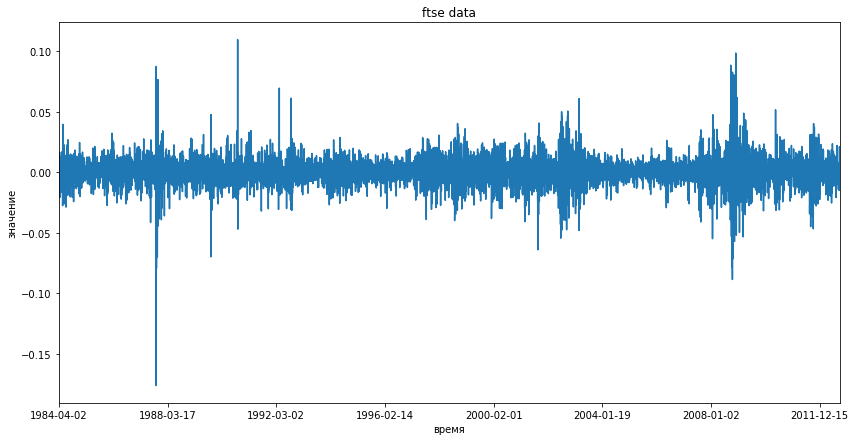

In [59]:
plt.figure(figsize=(14,7))
plt.title("ftse data")
plt.xlabel("время")
plt.ylabel("значение")
df_ts.plot() 
plt.show()

Как-то не очень похоже на индекс ftse, который описан по ссылке. Даты тоже подписаны другие, Просмотр файла говорит о том, что ошибок нет. При этом индекс начал расчитываться с 1984 года от отметки в 1000 пунктов.

Гипотеза: ряд продифференцирован.

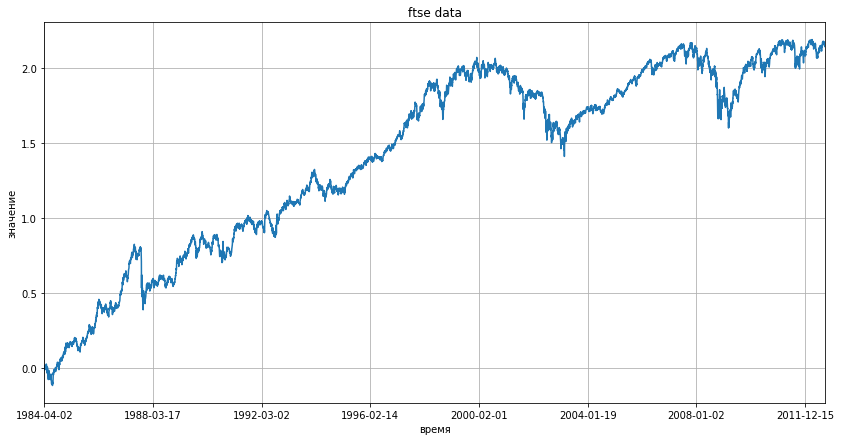

In [74]:
plt.figure(figsize=(14,7))
plt.title("ftse data")
plt.xlabel("время")
plt.ylabel("значение")
df_ts.cumsum().plot()
plt.grid()
plt.show()

Для сравнения картинка с wiki: (она до 2014 года, наша до 2011)
<img src="https://upload.wikimedia.org/wikipedia/commons/6/6d/FTSE_100_index_chart_since_1984.png" width=900px align=left>

Видно, что уже очень похожи, но что-то не так с дисперсией.

Гипотеза: ряд прологарифмировали.

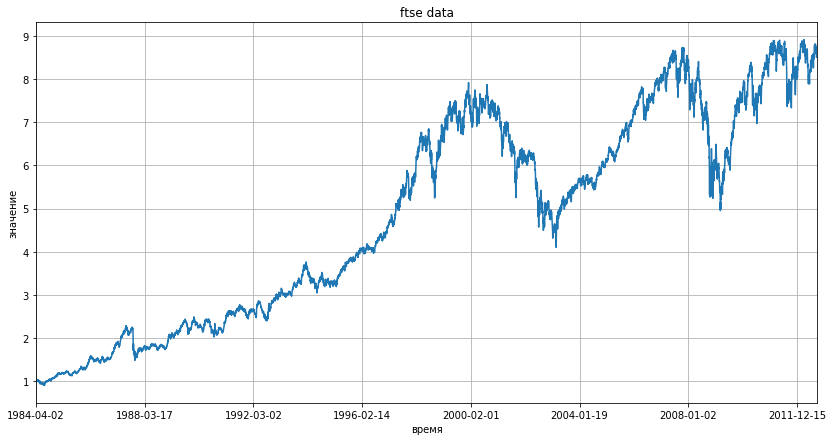

In [73]:
plt.figure(figsize=(14,7))
plt.title("ftse data")
plt.xlabel("время")
plt.ylabel("значение")
df_ts_exp = df_ts.cumsum()
df_ts_exp = np.exp(df_ts_exp)
df_ts_exp.plot()
plt.grid()
plt.show()

Получилось очень похоже на исходный ряд, хотя и не много не совпадает по растяжению вдоль y: в 2000 году индекс был 7000 пунктов, тогда как у нас 8, хотя в начале кажется, что достаточно умножить значение на тысячу. Тем не менее, примерное преобразование исходного ряда восстановлено. Возможно, были другие коэффициенты преобразования Бокса-Кокса.

__________________________

Рассмотрим полученные данные ещё раз.

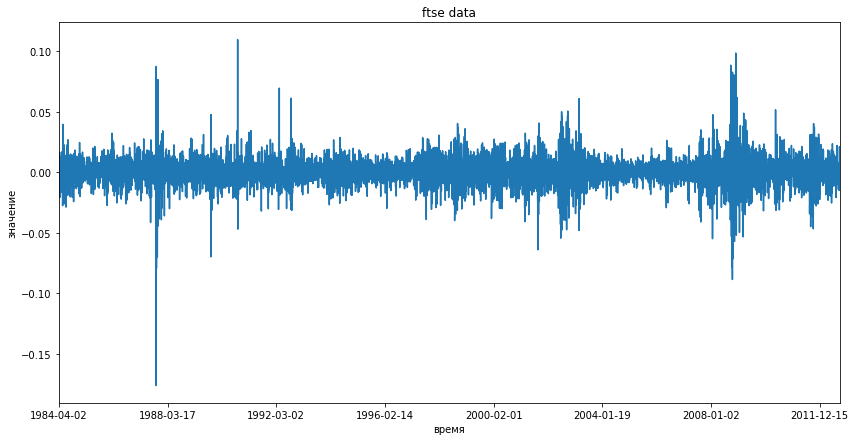

In [77]:
plt.figure(figsize=(14,7))
plt.title("ftse data")
plt.xlabel("время")
plt.ylabel("значение")
df_ts.plot() 
plt.show()

Будем считать, что этот ряд уже преобразован к виду, в котором мы будем искать разладки (он красивый и нормальные, тем более, что, как будем показано ниже, по таким данным можно обнаружить содержательные события.

В примере на семинаре для индекса S&P 500 в качестве разладок предлагалось искать "кризисы". 
Рассматривая исходный (или, что тоже самое, восстановленный нами график), видим изломы окого 1988 года (как я узнал поздее - это тоже кризис), изменение скорости роста (наклона прямой, которую можно провести через центр графика) после 1996 года (индекс стал рости быстрее), кризисы 2000 и 2008 года, и восстановление после кризисов в ~ 2003 и 2009 годах.

На преобразованном графике в эти периоды видны выбросы, как 1988 году, увеличение дисперсии (визуально, субъективно) после 1996 года, уменьшение после ~2003 года и то же самое ещё раз для ~2008 - 2009 года. Если после подсчёта кумулятивной суммы ряда мы получили кривую, которая растёт-падает, растёт, то на промежутках роста матожидание (хотя бы выборочное, как сумма, делённая на число измерений), было положительное, а на промежутках падения - отрицательное, чего не видно на графике с данными, которые нам дали.

Однако, если вежливо попросить, то это видно. Таким образом, детектирование изменения матожидания вполне уместно и полезно.

In [101]:
(
    df_ts["1984-04-03":"1996-01-01"].mean()
    / df_ts["1984-04-03":"1996-01-01"].std()
) # отнормировали

0.042794976544025198

In [102]:
(
    df_ts["2000-04-01":"2003-01-01"].mean()
    / df_ts["2000-04-01":"2003-01-01"].std()
) # отнормировали

-0.043028956472770087

In [105]:
df_ts["1984-04-03":"1996-01-01"].mean()

0.00047093882452268424

In [108]:
df_ts["1996-01-01":"2000-01-01"].mean() 
# Больше, чем до 1996. Изменение среднего на 0,0002 уже даёт заметный излом на графике.

0.00067588674184882889

Оценим, на сколько может менятся среднее в кризисы по 1988 году,
чтобы использовать это для прогнозирования в дальнейшем.

In [455]:
(
    df_ts["1984-04-03":"1987-01-01"].mean()
    / df_ts["1987-01-01":"1989-01-01"].mean()
)

2.660600506282103

___________________

Данные очень мохожи на нормальные, проверим это мощным тестом Шапиро-Уилка

In [126]:
def shapiro_describe(x, alpha = 0.05):
    shtest = sps.shapiro(x)
    print("Статистика критерия Шапиро-Уилка:", round(shtest[0], 5))
    print("p-value: ", round(shtest[1], 5))
    if shtest[1] < alpha:
        print("Гипотеза отвергается.\n")
    else:
        print("Гипотеза не отвергается.\n")
        
dates = ["1984-04-03", "1985-04-03", "1986-04-03", "1987-04-03", "1988-04-03"]

for i in range(len(dates) - 1):
    print("Период: " + dates[i] + ":" + dates[i + 1])
    shapiro_describe(df_ts[dates[i]:dates[i + 1]])

Период: 1984-04-03:1985-04-03
Статистика критерия Шапиро-Уилка: 0.98913
p-value:  0.05433
Гипотеза не отвергается.

Период: 1985-04-03:1986-04-03
Статистика критерия Шапиро-Уилка: 0.99244
p-value:  0.22619
Гипотеза не отвергается.

Период: 1986-04-03:1987-04-03
Статистика критерия Шапиро-Уилка: 0.99423
p-value:  0.43885
Гипотеза не отвергается.

Период: 1987-04-03:1988-04-03
Статистика критерия Шапиро-Уилка: 0.74521
p-value:  0.0
Гипотеза отвергается.



В первые три года мы не заметили каких-то особых проблем и критерий не отвергает гипотезу о нормальности этих выборок (~365 элементов в каждой). В третьем же году (не календарном, а от 04-03) был "кризис" и гипотеза уже отвергается.

Замечание: применение множественной проверки гипотез по методу Бонферрони не изменило бы результат, т.к. 0.0 * 4 < 0.05

Короче, данные за короткий (в примере выше - год) промежуток без разладок можно считать нормальными. 

In [127]:
sps.norm.fit(df_ts["1984-04-03":"1985-04-03"])

(0.00065469147118541501, 0.0099148930606364153)

In [151]:
def norm_fit_params(X):
    return X.mean(), X.std(ddof=1)  # исправленная выборочная дисперсия

def norm_fit(X):
    return sps.norm(*norm_fit_params(X))

In [236]:
norm_fit_params(df_ts["1984-04-03":"1985-04-03"])

(0.00065469147118541501, 0.0099345459898531035)

Напишем функции, которые будут считать статистики и строить графики. Логарифм отношения плотностей нормальных распределений можно считать с помощью sps.norm.pdf, но это дольше считается и вообще не круто, по этому, аналогично подсчётам с семинара (не считая, что дисперсии одинаковы) найдём логарифм отношения плотностей нормальных распределений в точке ручками. Если дисперсии равны, то получим формулу с семинара.

In [578]:
def CUSUM_and_Shiryaev(X, P_inf, P_0):
    """Считает статистики CUSUM и Ширяева-Робертса"""
    #P_inf_sps = sps.norm(*P_inf)
    #P_0_sps = sps.norm(*P_0)
    T = np.zeros_like(X)
    phi = np.zeros_like(X)
    for i in range(len(X)):
        Xk = X[i]
        #sk = np.log(P_0_sps.pdf(df_ts[i]) / P_inf_sps.pdf(df_ts[i]))
        sk_true = (
            np.log(P_inf[1] / P_0[1])
            - (Xk - P_0[0]) ** 2 / (2 * P_0[1] ** 2)
            + (Xk - P_inf[0]) ** 2 / (2 * P_inf[1] ** 2)
        )
        #print(sk, sk_true)
        phi[i] = (1. + phi[i - 1]) * np.exp(sk_true)
        #print(P_0.df(df_ts[i]), P_inf.cdf(df_ts[i]))
        T[i] = max(0, T[i - 1] + sk_true)
    return T, phi    

def plot_stats(start, end, params):
    """Воспомогательная функция построения
    графиков для plot_CUSUM_and_Shiryaev"""
    for ylim, stat, label, c, hlines in params:
        plt.figure(figsize=(14, 7))
        k_ts = df_ts.std() / ylim * 17
        (df_ts[start:end] / k_ts).plot(label="данные (растянуто)", c="blue")
        k_ts_exp = df_ts_exp.std() / ylim * 4
        (df_ts_exp[start:end] / k_ts_exp).plot(label="почти ftse100  (растянуто)",
                                               c="orange")
        plt.plot(stat, label=label, c=c)
        if not hlines is None:
            plt.hlines(hlines, 0, len(stat), label="порог")
        plt.ylim((-ylim, ylim))
        plt.ylabel(label)
        plt.legend()
        plt.show()
        
def plot_CUSUM_and_Shiryaev(start, end, P_inf, P_0, ylim=(15, 70000), hlines=False):
    """Строит графики статистик CUSUM и Ширяева-Робертса,
    отображая на фоне исходные данные и исходный ряд"""
    X = df_ts[start:end]
    T, phi = CUSUM_and_Shiryaev(X, P_inf, P_0)

    T_k = T[:365].mean()  +  T[:365].std() * 5
    phi_k = phi[:365].mean()  +  phi[:365].std() * 5

    if not hlines:
        plot_stats(start, end, [(ylim[0], T[:-1], "CUSUM", "green", None),
                                (ylim[1], phi[:-1], "phi", "red", None)])
    else:
        plot_stats(start, end, [(ylim[0], T[:-1], "CUSUM", "green", T_k),
                                (ylim[1], phi[:-1], "phi", "red", phi_k)])
    
    return T, phi

Помня, что в время кризисов среднее уменьшается (и становится отрицательным), оценим P_inf по первому году, а выберем P_0 как P_inf с математическим ожиданием, уменьшенным в 4 раза.

Посмотрим на графики целиком.

(0.00065469147118541501, 0.0099345459898531035) (0.00016367286779635375, 0.0099345459898531035)


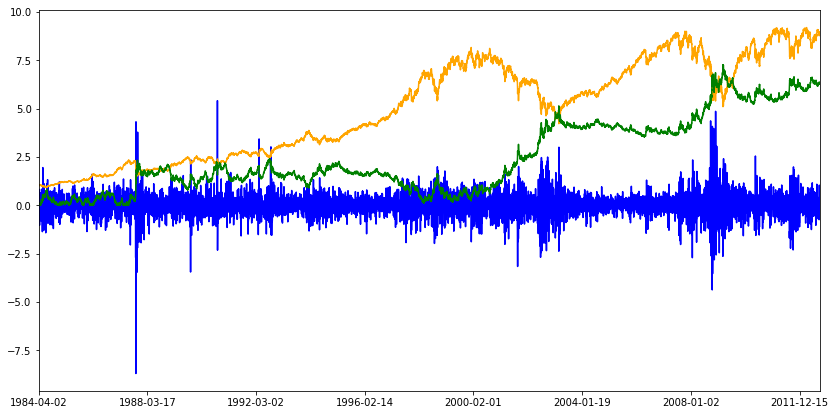

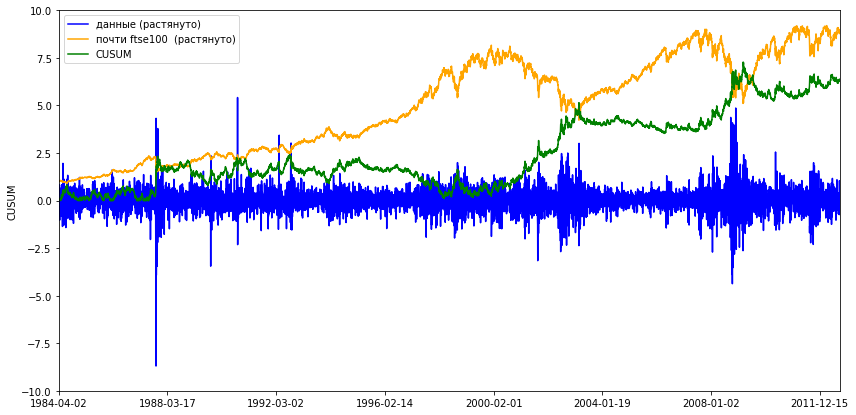

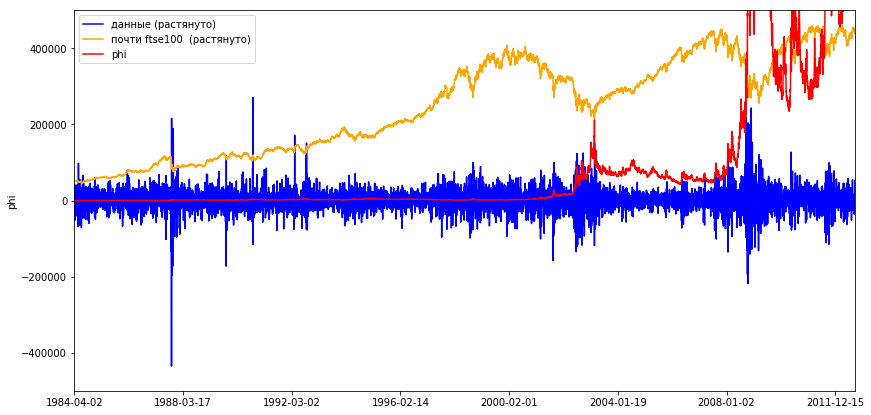

In [570]:
P_inf = norm_fit_params(df_ts["1984-04-03":"1985-04-03"])
P_0 = (P_inf[0] / 4., P_inf[1])
print(P_inf, P_0)
_ = plot_CUSUM_and_Shiryaev(0, -1, P_inf, P_0, ylim=(10, 500000))

Видно, что поведение CUSUM почти совпадает с поведением ряда (-ftse100) (рост вверх одного ряда соответствует росту другого ряда вниз и наоборот), хотя CUSUM строился по данным. Виден скачок в ~1988 году, плавный рост после 2000 года, соответствующий падению ftse100 и скачок в ~2008 году.

На графике статистики Ширяева есть скачок в ~1988 году (см. график ниже), плавный рост после ~2000 года, и скачок в 2008 году. Рассмотрим скачки подробнее.

(0.00060699166421224399, 0.0099439943376148747) (0.000151747916053061, 0.0099439943376148747)


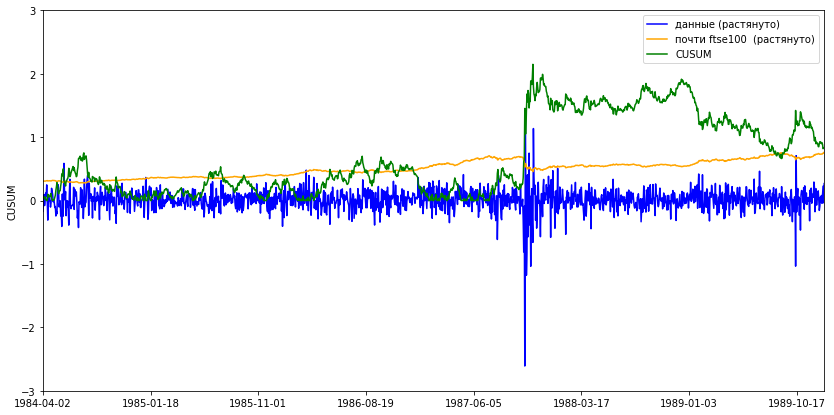

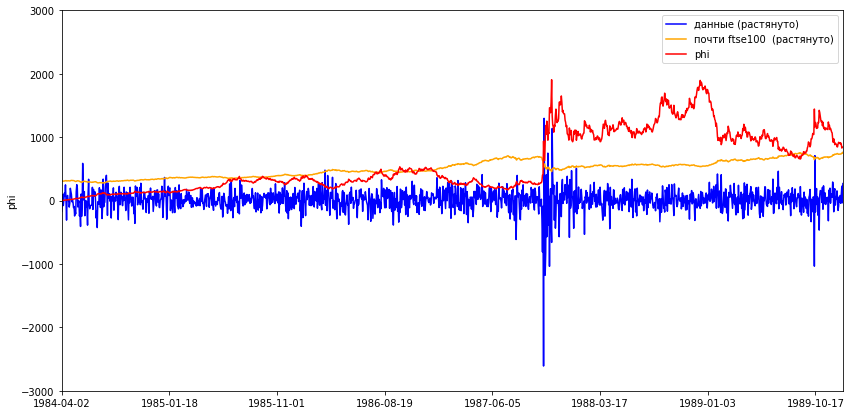

In [571]:
P_inf = norm_fit_params(df_ts["1984-04-02":"1985-04-03"])
P_0 = (P_inf[0] / 4., P_inf[1])
print(P_inf, P_0)
T, phi = plot_CUSUM_and_Shiryaev("1984-04-02", "1990-01-01",
                                 P_inf, P_0, ylim=(3, 3000))

Выбирая порог срабатывания как среднее + 5 стандартных отклонений значений статистик в "спокойное время" (первый год), посмотрим на даты обнаружения разладки.

In [572]:
T_k = T[:365].mean()  +  T[:365].std() * 5
phi_k = phi[:365].mean()  +  phi[:365].std() * 5
print(T_k, phi_k)
df.date.values[np.argmax(T > T_k)], df.date.values[np.argmax(phi > phi_k)]

1.06439804532 599.41820535


('1987-10-19', '1987-10-19')

По графику восстановленного ftse100 кажется, что момент падения индекса совпадает со скачком статистик. Воспользовавшись википедией, узнаем, что кризис 1988 года имеет название "Чёрный понедельник (англ. Black Monday) — понедельник 19 октября 1987 года" и при данном выборе порога срабатывания разладка была обнаружена мгновенно.

Если бы мы выбрали пороги менее аккуратно, то имели бы или ложное срабатывание, или обнаружили "микрокризис", или опоздали бы с обнаружением кризиса, например:

In [573]:
T_k = T[:365 * 3].mean()  +  T[:365 * 3].std() * 3
phi_k = phi[:365 * 3].mean()  +  phi[:365 * 3].std() * 3
print(T_k, phi_k)
df.date.values[np.argmax(T > T_k)], df.date.values[np.argmax(phi > phi_k)]

2.08579509691 1506.11666843


('1987-11-09', '1987-11-06')

(Опоздание на ~три недели)

In [574]:
T_k = 1
phi_k = 1000  # визуально
print(T_k, phi_k)
df.date.values[np.argmax(T > T_k)], df.date.values[np.argmax(phi > phi_k)]

1 1000


('1987-10-19', '1987-10-23')

________
Попробуем обнаружить разладки 2000 года. Выберем порог как раньше.

(0.00022683139688668355, 0.012367735923153466) (-0.00022683139688668355, 0.012367735923153466)


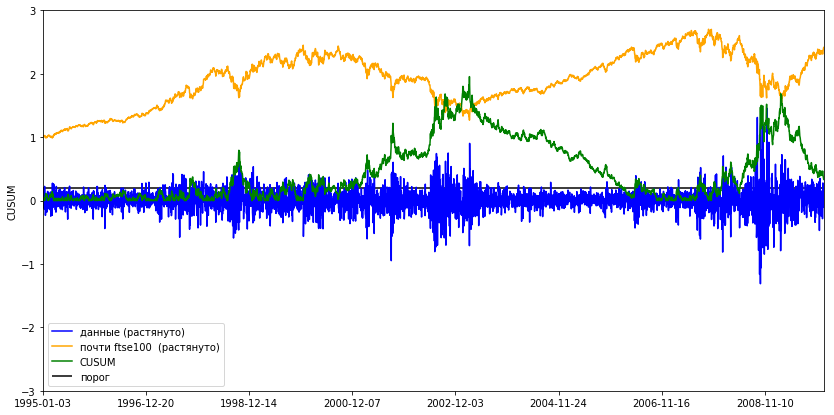

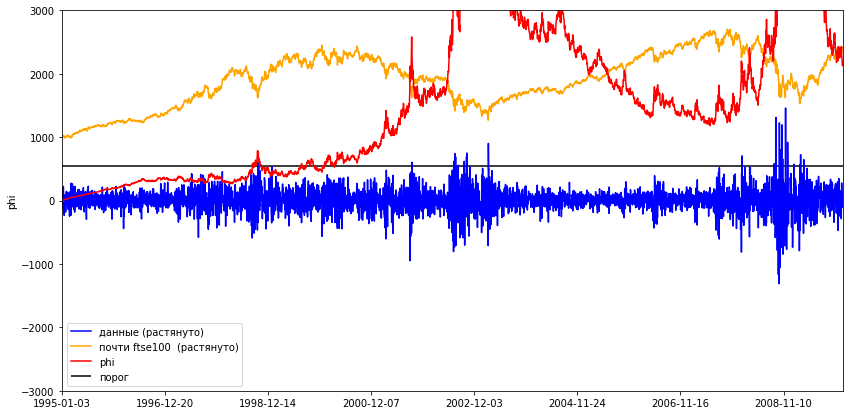

In [581]:
P_inf = norm_fit_params(df_ts["1995-01-01":"2010-01-01"])
P_0 = (P_inf[0] * -1, P_inf[1])
print(P_inf, P_0)
T, phi = plot_CUSUM_and_Shiryaev("1995-01-01", "2010-01-01",
                                 P_inf, P_0, ylim=(3, 3000), hlines=True)

Имеем ложное срабатывание у CUSUM в 1997 году, после чего имеем периодические срабатывания на плато между 1999 и 2001 годом, хотя индекс почти не меняется. Статистика Ширяева же срабатывает там, где нужно (падение в декабре 1998), но с задержкой в несколько месяцев от изменения поведения индекса.

_________________
Для разнообразия попробуем детектировать не падение матожидания, а рост, который часто происходит перед кризисом.

(0.00030191652682084297, 0.011903491369115608) (0.00060383305364168595, 0.011903491369115608)


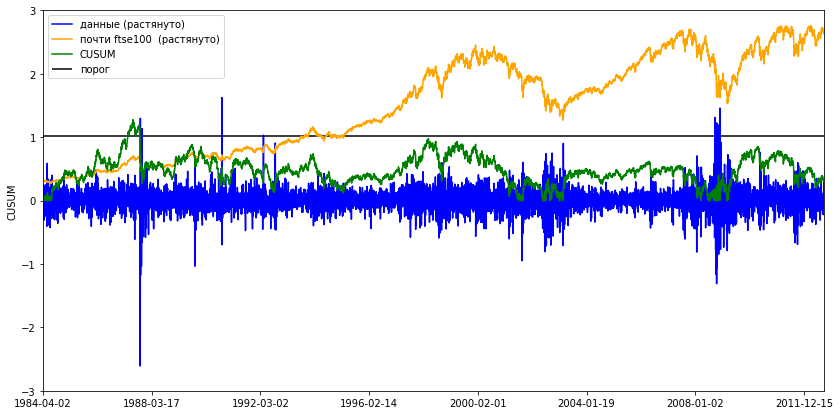

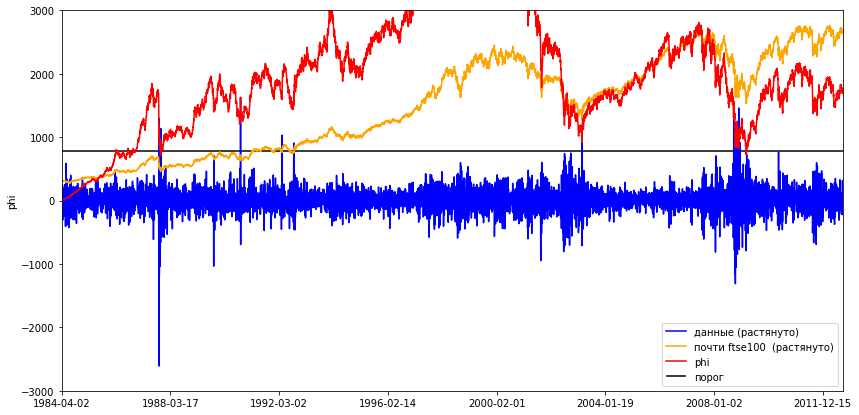

In [587]:
P_inf = norm_fit_params(df_ts)
P_0 = (P_inf[0]*2, P_inf[1] )
print(P_inf, P_0)
T, phi = plot_CUSUM_and_Shiryaev(0, -1, P_inf, P_0,
                                 ylim=(3, 3000), hlines=True)

Статистика CUSUM обнаружира разладку вовремя, если разглядывать рост перед кризисом 1987 года. Для статистики Ширяева же порог выбран не удачно и имеет место ложное срабатывание хотя при более корректном выборе порога ~1000 рост разладка в виде роста матожидания была бы зафиксирована, хоть и с задержкой в несколько месяцев.

_________________________
Посмотрим так же на увеличение дисперсии

(0.00030191652682084297, 0.011903491369115608) (0.00030191652682084297, 0.013093840506027171)


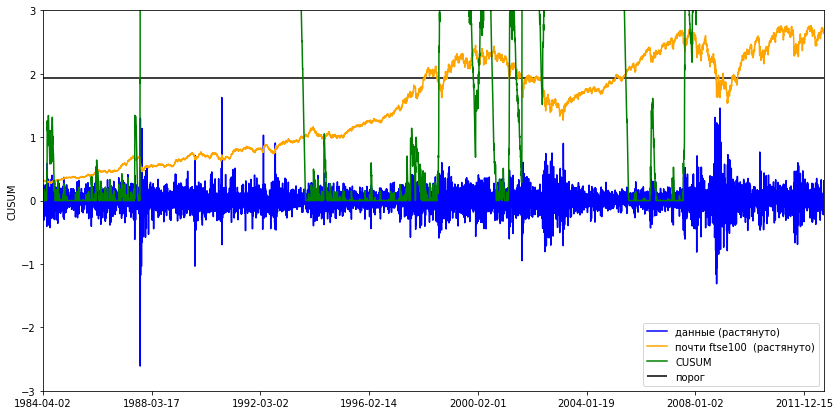

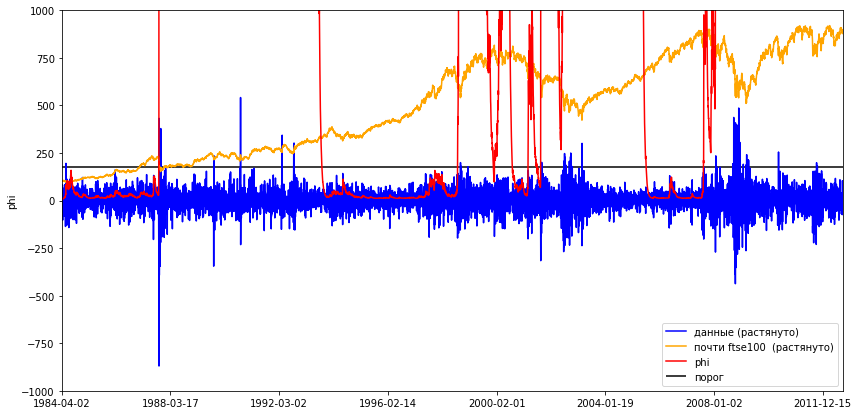

In [596]:
P_inf = norm_fit_params(df_ts)
P_0 = (P_inf[0], P_inf[1]*1.1)
print(P_inf, P_0)
T, phi = plot_CUSUM_and_Shiryaev(0, -1, P_inf, P_0,
                                 ylim=(3, 1000), hlines=True)

Считая, что после возвращения статистики в ноль(тоже самое, как если бы мы запустили её расчёт из этой точки) она перезапускается и может снова обнарующивать разладки в виду увеличения дисперсии, заметим, что статистики примерно отслеживают увеличения дисперсии в 1988, ~1999 и 2008 году, хотя визуально больше похоже на реакцию на выбросы.

Для этих данных, видимо, полезно смотреть на разладки вида увеличения и уменьшения дисперсии как предпосылки к кризису.

___________
### internet-traffic.csv (IT)

In [615]:
!cat internet-traffic.csv | head -n 5

In [616]:
df = pd.read_csv("internet-traffic.csv", ";")
data_list = df["Internet traffic data (in bits) from an ISP"].tolist()
dates_list = df["Time"].tolist()
df_ts = pd.Series(data_list, index=dates_list)

In [617]:
df_ts.head()

2004-11-19 09:30:00    64554.479
2004-11-19 10:30:00    71138.749
2004-11-19 11:30:00    77253.266
2004-11-19 12:30:00    77340.780
2004-11-19 13:30:00    79860.759
dtype: float64

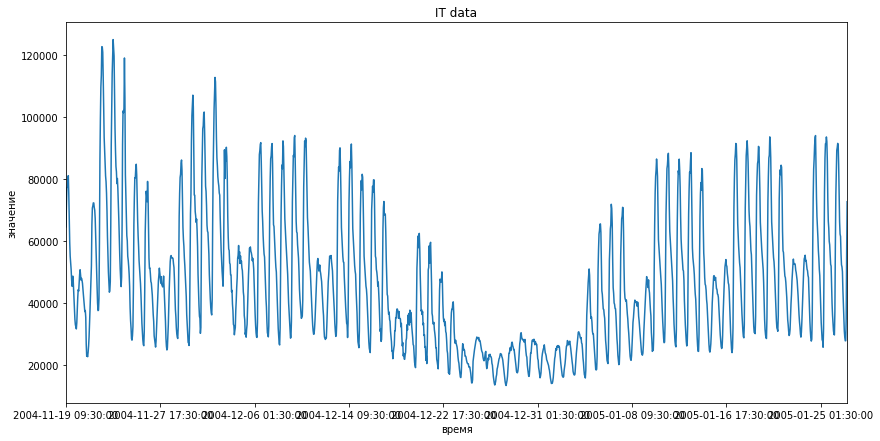

In [618]:
plt.figure(figsize=(14,7))
plt.title("IT data")
plt.xlabel("время")
plt.ylabel("значение")
df_ts.plot() 
plt.show()

Этот ряд имеет, судя по повторяющимся 5 высоким и 2 низким пикам, недельную сезонность и должен быть преобразован.
Даты снизу намекают, что в качестве разладок нужно искать (пред)новогодние праздники, которые как убрали высокие пики рабочих дней, так и в целом уменьшили дисперсию в выходные дни, и уменьшили среднее значение.

Собственно, абсолютные значения трафика вызывают вопросы, т.к. ~ 120 килобит пиковой нагрузки это что-то странное даже если это нагрузка в секунду.

______
Применим сезонное и обычное дифференцирование.

In [680]:
X = np.log(df_ts)
X = X[7*24:] - X[: -7*24].values
X = X[1:] - X[: -1].values  # Делая операции так мы сохраним даты

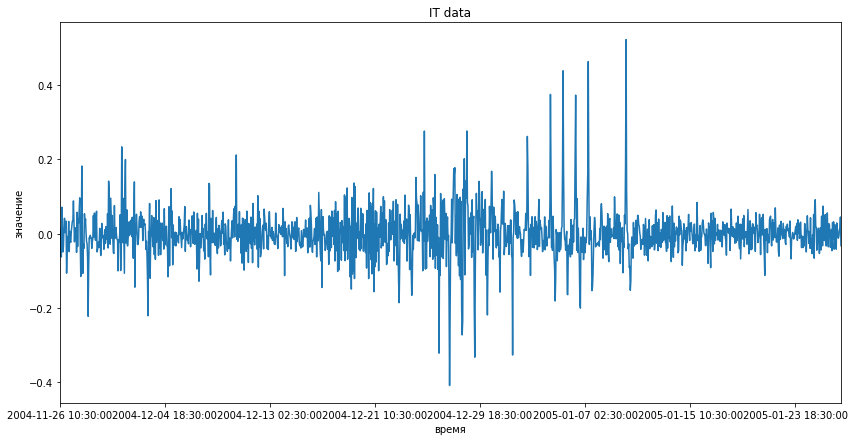

In [681]:
plt.figure(figsize=(14,7))
plt.title("IT data")
plt.xlabel("время")
plt.ylabel("значение")
X.plot() 
plt.show()

In [683]:
shapiro_describe(X[:24*2])  # можно считать нормальным

Статистика критерия Шапиро-Уилка: 0.96236
p-value:  0.12579
Гипотеза не отвергается.



In [685]:
X[24*4:24*6].mean()

0.010703122426135728

In [686]:
X[24*0:24*2].mean()

0.0028221459349716538

In [703]:
P_inf = norm_fit_params(X[0: 24*2])
P_0 = (P_inf[0], P_inf[1] * 1.5)
T, phi = CUSUM_and_Shiryaev(X, P_inf, P_0)

for ylim, stat, name, c in [(25, T, "CUSUM", "green"),
                            (200000, phi, "Ширяев", "red")]:
    plt.figure(figsize=(14,7))
    k_X = X[0:7*24].max() / ylim * 2
    (X / k_X).plot(label="Преобразованный ряд", c="blue")
    k_df_ts = df_ts.max() / ylim * 1.5
    (df_ts[7*24+1:] / k_df_ts).plot(label="Исходный ряд", c="orange")
    # подгоняем время к началу отсчёта X
    plt.plot(stat, label=name, c=c)
    plt.ylim((-ylim, +ylim))
    plt.legend()
    plt.show()

Таким образом, выставляя пороги на уровне 15 и 150000, мы обнаружим разладку 26 декабря ночью или 25 декабря утром с помощью CUSUM и статистики Ширяева соответственно. (Визуально по исходным данным трафик начал падать около 17 декабря)

In [773]:
(
    df[24*7 + 1:].Time.values[(T > 15).argmax()],
    df[24*7 + 1:].Time.values[(phi > 150000).argmax()]
)

('2004-12-26 05:30:00', '2004-12-25 08:30:00')

Выставляя более аккуратные пороги и считая, что после возврата в ноль статистика как будто считается с начала (как уже говорилось, численно это одно и то же), то мы можем обнаружит разладку раньше ('2004-12-19 20:30:00' с CUSUM, что достаточно близко к 7-18 декабря, определённым визуально), но с ложным срабатыванием первого декабря.

In [775]:
(
    df[24*7 + 1:].Time.values[(T > 8)][:12],
    df[24*7 + 1:].Time.values[(phi > 70000)][:12]
)

(array(['2004-12-01 15:30:00', '2004-12-01 16:30:00', '2004-12-01 17:30:00',
        '2004-12-01 18:30:00', '2004-12-01 19:30:00', '2004-12-01 20:30:00',
        '2004-12-19 20:30:00', '2004-12-21 08:30:00', '2004-12-21 10:30:00',
        '2004-12-21 11:30:00', '2004-12-21 12:30:00', '2004-12-21 13:30:00'], dtype=object),
 array(['2004-12-01 15:30:00', '2004-12-01 16:30:00', '2004-12-25 08:30:00',
        '2004-12-25 09:30:00', '2004-12-25 10:30:00', '2004-12-25 11:30:00',
        '2004-12-25 12:30:00', '2004-12-25 13:30:00', '2004-12-25 14:30:00',
        '2004-12-25 15:30:00', '2004-12-25 16:30:00', '2004-12-25 17:30:00'], dtype=object))

Прогнозирование уменьшения дисперсии или изменения матожидания даёт неинтересный результат. 

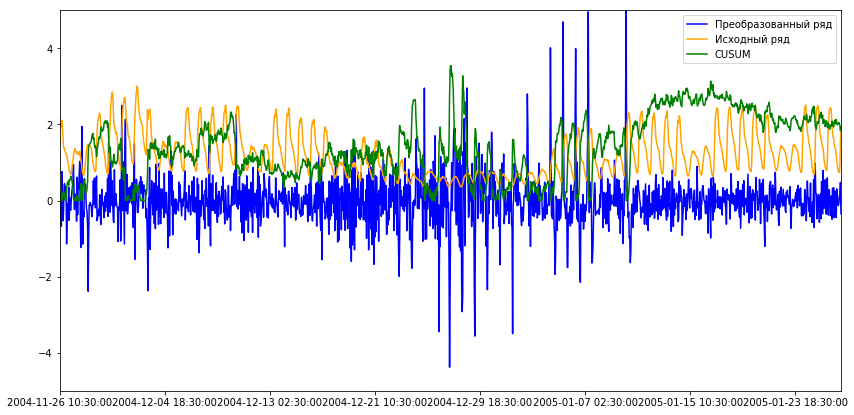

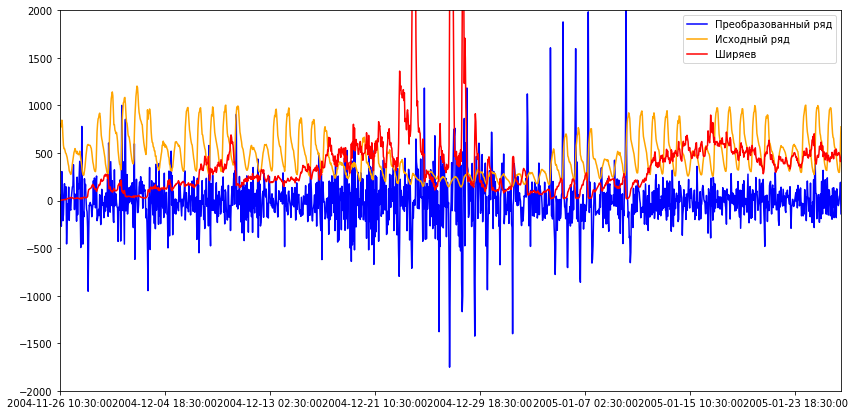

In [781]:
P_inf = norm_fit_params(X[0: 24*2])
P_0 = (P_inf[0] * (-2), P_inf[1])
T, phi = CUSUM_and_Shiryaev(X, P_inf, P_0)

for ylim, stat, name, c in [(5, T, "CUSUM", "green"),
                            (2000, phi, "Ширяев", "red")]:
    plt.figure(figsize=(14,7))
    k_X = X[0:7*24].max() / ylim * 2
    (X / k_X).plot(label="Преобразованный ряд", c="blue")
    k_df_ts = df_ts.max() / ylim * 1.5
    (df_ts[7*24+1:] / k_df_ts).plot(label="Исходный ряд", c="orange")
    # подгоняем время к началу отсчёта X
    plt.plot(stat, label=name, c=c)
    plt.ylim((-ylim, +ylim))
    plt.legend()
    plt.show()

Попробуем другие преобразования ряда

Например, оставим только недельное дифференцирование и будем прогнозировать увеличение матожидания.
Данный ряд, конечно, даже визуально не похож на независимые нормальные величины, но посмотрим, вдруг получится что-то разумное.

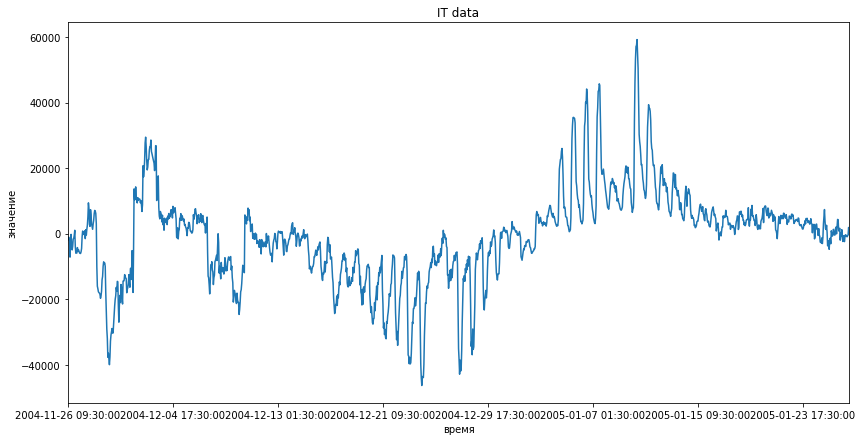

In [808]:
X = df_ts
X = X[7*24:] - X[: -7*24].values
# X = X[1:] - X[: -1].values  # Делая операции так мы сохраним даты

plt.figure(figsize=(14,7))
plt.title("IT data")
plt.xlabel("время")
plt.ylabel("значение")
X.plot() 
plt.show()

In [812]:
shapiro_describe(X[:24*1]) 
# с большими оговорками закроем глаза на ненормальность распределения.

Статистика критерия Шапиро-Уилка: 0.93896
p-value:  0.15465
Гипотеза не отвергается.



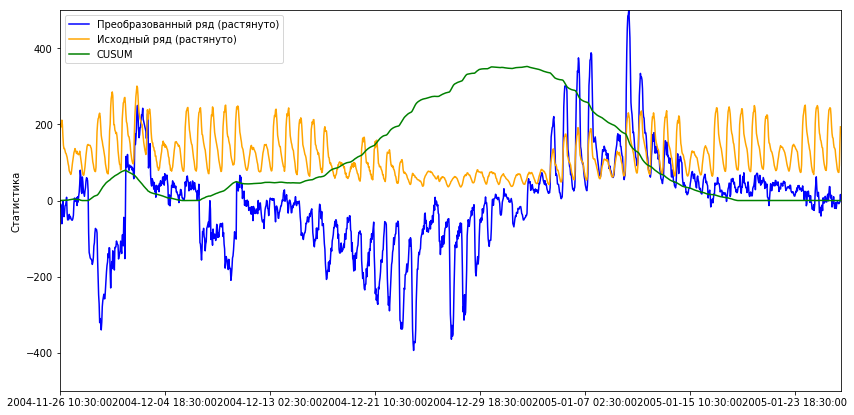

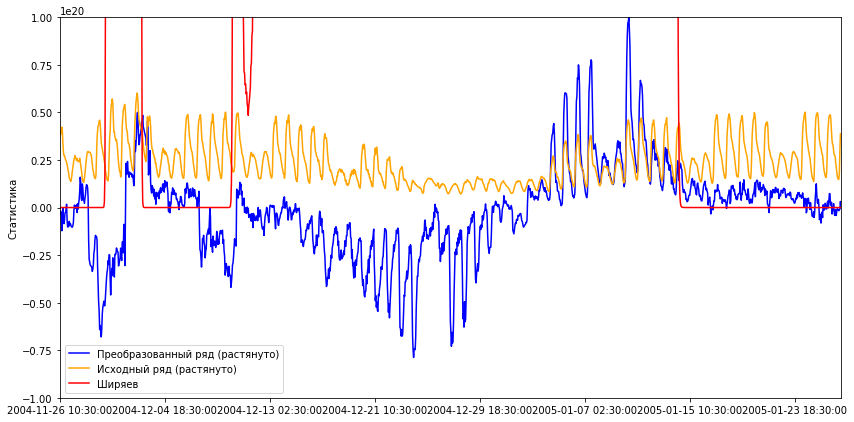

In [802]:
P_inf = norm_fit_params(X[0: 24*2])
P_0 = (P_inf[0] * 2, P_inf[1])
T, phi = CUSUM_and_Shiryaev(X, P_inf, P_0)

for ylim, stat, name, c in [(500, T, "CUSUM", "green"),
                            (1e20, phi, "Ширяев", "red")]:
    plt.figure(figsize=(14,7))
    k_X = X[0:7*24].max() / ylim * 2
    (X / k_X).plot(label="Преобразованный ряд (растянуто)", c="blue")
    k_df_ts = df_ts.max() / ylim * 1.5
    (df_ts[7*24+1:] / k_df_ts).plot(label="Исходный ряд (растянуто)",
                                    c="orange")
    # подгоняем время к началу отсчёта X
    plt.plot(stat, label=name, c=c)
    plt.ylim((-ylim, +ylim))
    plt.ylabel("Статистика")
    plt.legend()
    plt.show()

По CUSUM получились вполне интерпретируемые результаты, которые, при выборе порога на уровне ~100 не только не вызовут ложного срабатывания, но и определят предновогодний спад почти сразу как он становится виден на исходном графике.

На графике статистики Ширяева-Робертса получилось что-то мало интерпретируемое.

Дальнейшее тестирование на уменьшение матожидания или изменение дисперсии не дало интересных результатов.

Не проще ли определять наступление нового года по календарю?

_____________
Попробуем максимально ленивый вариант, без каких-либо преобразований.

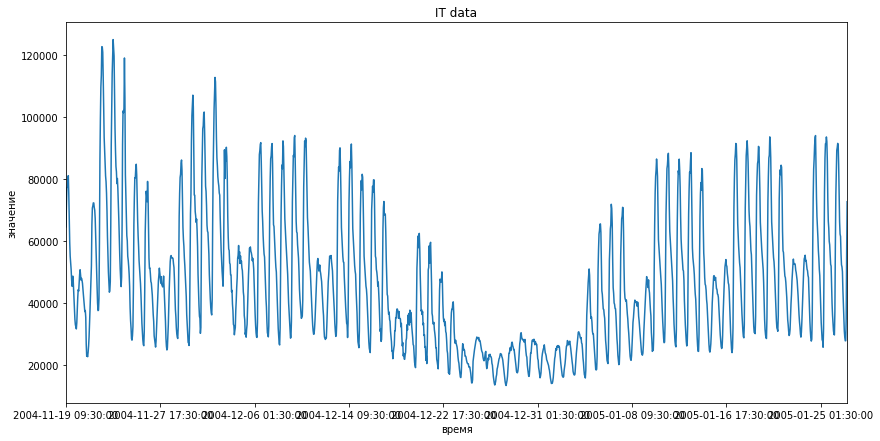

In [813]:
X = df_ts

plt.figure(figsize=(14,7))
plt.title("IT data")
plt.xlabel("время")
plt.ylabel("значение")
X.plot() 
plt.show()

In [815]:
shapiro_describe(X[:24*1]) 
# с большими оговорками закроем глаза на ненормальность распределения (2)

Статистика критерия Шапиро-Уилка: 0.91851
p-value:  0.05416
Гипотеза не отвергается.



Проверять будем на уменьшение матожидания.

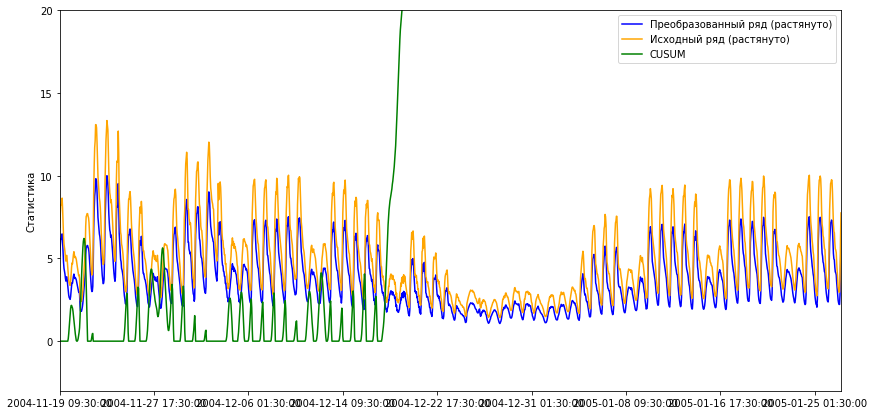

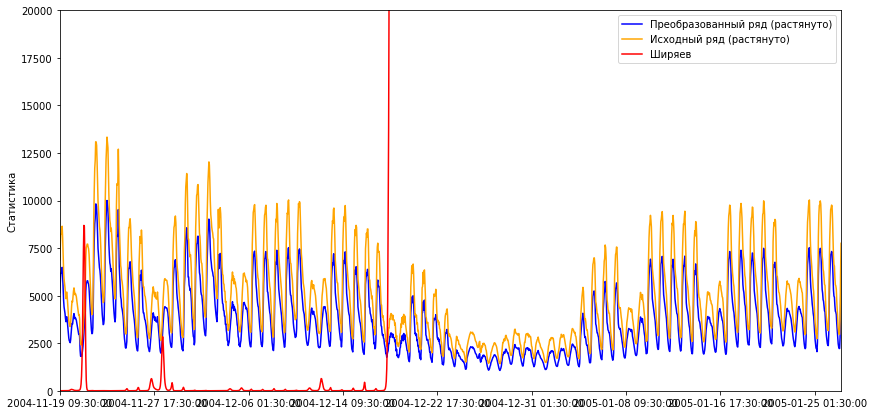

In [840]:
P_inf = norm_fit_params(X[0: 24*2])
P_0 = (P_inf[0] * 0.8, P_inf[1])
T, phi = CUSUM_and_Shiryaev(X, P_inf, P_0)

for ylim, stat, name, c in [(20, T, "CUSUM", "green"),
                            (20000, phi, "Ширяев", "red")]:
    plt.figure(figsize=(14,7))
    k_X = X[0:7*24].max() / ylim * 2
    (X / k_X).plot(label="Преобразованный ряд (растянуто)", c="blue")
    k_df_ts = df_ts.max() / ylim * 1.5
    (df_ts / k_df_ts).plot(label="Исходный ряд (растянуто)", c="orange")
    plt.plot(stat, label=name, c=c)
    plt.ylim((-3, +ylim))
    plt.ylabel("Статистика")
    plt.legend()
    plt.show()

Выставляя границы по описанной выше методике, получим, что такой ленивый метод даёт наилучший результат: CUSUM сообщит о разладке в '2004-12-18 11:30:00' с задержкой подачи сигнала в полтора дня или даже меньше, в зависимости  от того, считаем ли мы, что разладка произошла 17 или 18 декабря. Статистика Ширяева же даст ложное срабатывание '2004-11-21 11:30:00', но определит разладку на два часа раньше в '2004-12-18 09:30:00'.

In [846]:
T_k = T[:24*7].mean()  +  T[:24*7].std() * 5
phi_k = phi[:24*7].mean()  +  phi[:24*7].std() * 5
print(T_k, phi_k)
df.Time.values[(T > T_k).argmax()], df.Time.values[(phi > phi_k)][:5]

7.9129870983 6988.08759967


('2004-12-18 11:30:00',
 array(['2004-11-21 11:30:00', '2004-11-21 12:30:00', '2004-11-21 13:30:00',
        '2004-11-21 14:30:00', '2004-12-18 09:30:00'], dtype=object))

Выбирая пороги более грамотно, можно избежать ложного срабатывания, но и потерять 2 - 6 часов в обнаружении разладки.

In [850]:
T_k = T[:24*7].max()  +  T[:24*7].std() * 2
phi_k = phi[:24*7].max()  +  phi[:24*7].std() * 2
print(T_k, phi_k)
df.Time.values[(T > T_k).argmax()], df.Time.values[(phi > phi_k).argmax()]

9.08009204085 11363.001295


('2004-12-18 17:30:00', '2004-12-18 10:30:00')

Таким образом, самый ленивый из рассмотренных нами способов оказался одновременно и самым точным, несмотря на нарушение ряда предположений.

Отслеживание уменьшения дисперсии на этих данных обнаруживает как разладки любые выходные (что тоже может быть полезно), а не то, что нам нужно.